In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

Importing Data set

In [4]:
((X_train, Y_train), (X_test, Y_test)) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_labels = pd.Series(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Code', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])
labels_dict = class_labels.to_dict()
labels_dict

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Code',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

Three smaple of trainng set

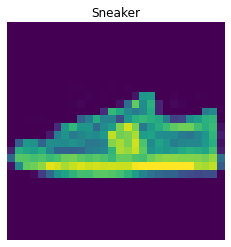

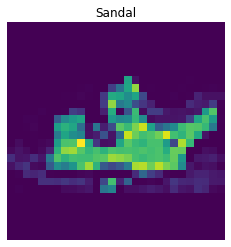

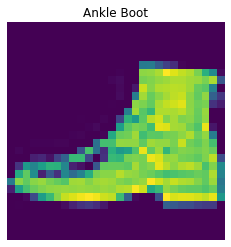

In [7]:
np.random.seed(4)
for rand_num in np.random.randint(0, len(X_train), 3):
    plt.figure()
    plt.imshow(X_train[rand_num]), plt.axis('off')
    plt.title(labels_dict[Y_train[rand_num]])

preprocessing

In [8]:
X_train_reshaped = X_train.reshape(len(X_train), -1)   
X_test_reshaped = X_test.reshape(len(X_test), -1)

X_train_norm = X_train_reshaped/255            
X_test_norm = X_test_reshaped/255

In [9]:
n_features = X_train_norm.shape[1]
n_classes =  len(class_labels)

print('Number of input features (image pixels) : ', n_features)
print('Number of target classes (fashion categories) : ', n_classes)

Number of input features (image pixels) :  784
Number of target classes (fashion categories) :  10


In [10]:
Y_train_onehot = to_categorical(Y_train, num_classes = n_classes)
Y_test_onehot = to_categorical(Y_test, num_classes = n_classes)

Split validation set

In [11]:
X_train_final, X_valid, Y_train_final, Y_valid = train_test_split(X_train_norm, Y_train_onehot, 
                                                                  test_size=0.16666)

print('Shape of data used for training, and shape of training targets : \n ', X_train_final.shape, ',', Y_train_final.shape)
print('Shape of data used for validation, and shape of validation targets: \n ', X_valid.shape, ',', Y_valid.shape)


Shape of data used for training, and shape of training targets : 
  (50000, 784) , (50000, 10)
Shape of data used for validation, and shape of validation targets: 
  (10000, 784) , (10000, 10)


Building Neural Network

In [12]:
model = Sequential()
model.add(Dense(1000, input_dim = n_features, activation='relu', use_bias=False))
model.add(Dense(1000, activation='relu', use_bias=False))
model.add(Dense(500, activation='relu', use_bias=False))
model.add(Dense(200, activation='relu', use_bias=False))
model.add(Dense(n_classes, activation='softmax', use_bias=False))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              784000    
                                                                 
 dense_1 (Dense)             (None, 1000)              1000000   
                                                                 
 dense_2 (Dense)             (None, 500)               500000    
                                                                 
 dense_3 (Dense)             (None, 200)               100000    
                                                                 
 dense_4 (Dense)             (None, 10)                2000      
                                                                 
Total params: 2,386,000
Trainable params: 2,386,000
Non-trainable params: 0
_________________________________________________________________


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
save_at = "/content/drive/MyDrive/MUD"
save_best_model = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, 
                             save_best_only=True, save_weights_only=False, mode='max')


Training of Neural Network

Epoch 1/10
2500/2500 [==============================] - 11s 3ms/step - loss: 0.4876 - accuracy: 0.8268 - val_loss: 0.3697 - val_accuracy: 0.8667
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3489 - accuracy: 0.8734 - val_loss: 0.3588 - val_accuracy: 0.8727
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3098 - accuracy: 0.8840 - val_loss: 0.3713 - val_accuracy: 0.8642
Epoch 4/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2806 - accuracy: 0.8950 - val_loss: 0.3058 - val_accuracy: 0.8894
Epoch 5/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2566 - accuracy: 0.9038 - val_loss: 0.3164 - val_accuracy: 0.8871
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.3049 - val_accuracy: 0.8876
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2193 - accuracy: 0.9170 - val_loss: 0.3091 - val_accuracy

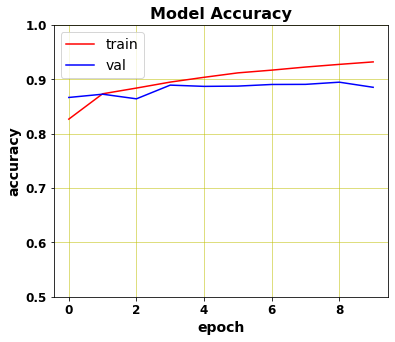

In [15]:
history = model.fit( X_train_final, Y_train_final, 
                    epochs = 10, batch_size = 20, 
                    callbacks=[save_best_model], verbose=1, 
                    validation_data = (X_valid, Y_valid) )

plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.5, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

Test Accuracy

In [16]:
score = model.evaluate(X_test_norm, Y_test_onehot, verbose=1)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8800
Accuracy over the test set: 
  88.0 %


In [17]:
trained_model = load_model("/content/drive/MyDrive/MUD")
trained_model.layers

Weigh Prouning

In [19]:
all_weights = {}

for layer_no in range(total_no_layers - 1):         #All except the final layer                                                                          #only the first four dense layers are to be pruned
    layer_weights = (pd.DataFrame(trained_model.layers[layer_no].get_weights()[0]).stack()).to_dict()
     
    layer_weights = { (layer_no, k[0], k[1]): v for k, v in layer_weights.items() }
    all_weights.update(layer_weights)
    

In [20]:
#sorted vales in dictionary based on wights or value, and in ascending order
all_weights_sorted = {k: v for k, v in sorted(all_weights.items(), key=lambda item: abs(item[1]))}  

In [23]:
total_no_weights = len(all_weights_sorted) 
total_no_weights 

2384000

Pruning percentages

In [24]:
K = [0,10, 20, 30, 40, 50,60, 70, 80, 90, 99]   

In [25]:
weight_pruning_scores = []

for pruning_percent in K:

    new_model = load_model("/content/drive/MyDrive/MUD")
    new_weights = trained_model.get_weights().copy()
    
    prune_fraction = pruning_percent/100
    number_of_weights_to_be_pruned = int(prune_fraction*total_no_weights) 
    #select triples that belong in prunning percentage
    weights_to_be_pruned = {k: all_weights_sorted[k] for k in list(all_weights_sorted)[ :number_of_weights_to_be_pruned]}     
    #based on Psitions that found before we should zero out weights in new_weights
    for k, v in weights_to_be_pruned.items():
        new_weights[k[0]][k[1], k[2]]=0
    #reshape weights in layers
    for layer_no in range(total_no_layers - 1) :
      new_layer_weights = new_weights[layer_no].reshape(1, new_weights[layer_no].shape[0], new_weights[layer_no].shape[1])
      new_model.layers[layer_no].set_weights(new_layer_weights)
    #evaluate model with new weights on test set
    new_score  = new_model.evaluate(X_test_norm, Y_test_onehot, verbose=1)
    weight_pruning_scores .append(new_score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.3011 - accuracy: 0.1009


In [27]:
new_model.layers

Neuron Prunning

In [42]:
all_neurons = {}

for layer_no in range(total_no_layers - 1):         

    layer_neurons = {}
    layer_neurons_df = pd.DataFrame(trained_model.layers[layer_no].get_weights()[0])

    for i in range(len(layer_neurons_df.columns)):
      layer_neurons.update({ i : np.array( layer_neurons_df.iloc[:,i] ) })  
    
    layer_neurons = { (layer_no, k): v for k, v in layer_neurons.items() }
    all_neurons.update(layer_neurons)  

In [45]:
#sorted weightes based on L2 norm in ascending order
all_neurons_sorted = {k: v for k, v in sorted(all_neurons.items(), key=lambda item: np.linalg.norm(item[1], ord=2, axis=0))}

In [46]:
total_no_neurons = len(all_neurons_sorted) 
total_no_neurons 

2700

In [47]:
neuron_pruning_scores = []

for pruning_percent in K:

    new_model = load_model("/content/drive/MyDrive/MUD")
    new_weights = trained_model.get_weights().copy()

    prune_fraction = pruning_percent/100
    number_of_neurons_to_be_pruned = int(prune_fraction*total_no_neurons)
    neurons_to_be_pruned = {k: all_neurons_sorted[k] for k in list(all_neurons_sorted)[ : number_of_neurons_to_be_pruned]}     

    for k, v in neurons_to_be_pruned.items(): #zero out based on total
        new_weights[k[0]][:, k[1]] = 0

    for layer_no in range(total_no_layers - 1) :  #for 4 layers
        new_layer_weights = new_weights[layer_no].reshape(1, new_weights[layer_no].shape[0], new_weights[layer_no].shape[1])
        new_model.layers[layer_no].set_weights(new_layer_weights)
    
    new_score  = new_model.evaluate(X_test_norm, Y_test_onehot, verbose=1)
    neuron_pruning_scores.append(new_score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


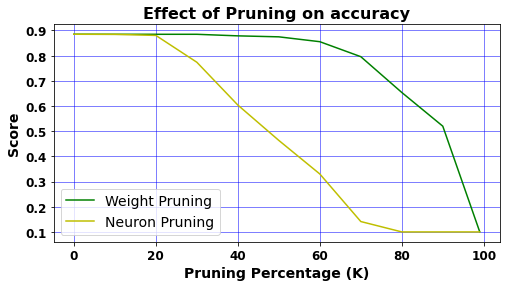

In [49]:
plt.figure(figsize=(8, 4))
plt.plot(pd.DataFrame(weight_pruning_scores).set_index(pd.Series(K), drop=True) , color='g')
plt.plot(pd.DataFrame(neuron_pruning_scores).set_index(pd.Series(K), drop=True) , color='y')
plt.title('Effect of Pruning on accuracy', weight='bold', fontsize=16)
plt.ylabel('Score', weight='bold', fontsize=14)
plt.xlabel('Pruning Percentage (K)', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['Weight Pruning', 'Neuron Pruning'], loc='best', prop={'size': 14})
plt.grid(color = 'b', linewidth='0.5')
plt.show()